In [22]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from IPython import get_ipython
import math


get_ipython().run_line_magic('matplotlib', 'inline')

In [17]:
path = "/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_2/"
file = "amcl_laser"
file_2 = "_num_markers"
file_3 = "_num_particles"
file_4 = "_weight_sensor"
file_5 = "_marker_error"
type_file =".txt"
full_path = str(path + file + type_file)
full_path_2 = str(path + file  + file_2 + type_file)
full_path_3 = str(path + file  + file_3 + type_file)
full_path_4 = str(path + file  + file_4 + type_file)
full_path_4

'/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_2/amcl_laser_marker_error.txt'

In [18]:
data = pandas.read_csv(full_path, skipinitialspace = True)
data.head()

,Time,X position error,Y position error,Position error,YAW error,X deviation,Y deviation,YAW deviation,Mean deviation
0,3.107,0.039199,0.027688,0.047991,-0.757224,0.490347,0.501877,0.254218,0.415481
1,4.507,0.039937,0.046026,0.060937,-0.289985,0.495202,0.510767,0.248215,0.418061
2,6.005,0.050334,0.034701,0.061136,-0.321977,0.518122,0.537074,0.241869,0.432355
3,7.409,0.046847,0.039572,0.061324,-0.347132,0.527800,0.525637,0.235817,0.429751
4,9.005,0.032741,0.027655,0.042857,-0.755716,0.543805,0.545525,0.238562,0.442631


In [19]:
data_2 = pandas.read_csv(full_path_2, skipinitialspace = True)
data_2.head()

,Time,Num Markers
0,0.054,1
1,0.309,1
2,0.530,1
3,0.745,1
4,0.993,1


In [20]:
data_3 = pandas.read_csv(full_path_3, skipinitialspace = True)
data_3.head()

,Time,Num Particles
0,0.006,2209
1,3.116,2062
2,4.511,1915
3,6.010,1799
4,7.409,1620


In [21]:
data_4 = pandas.read_csv(full_path_4, skipinitialspace = True)
data_4.head()

,Time,Weight Laser,Weight Marker
0,0.000,0.000000,0
1,3.101,1.086134,0
2,4.507,1.060893,0
3,6.005,1.063650,0
4,7.408,1.117240,0


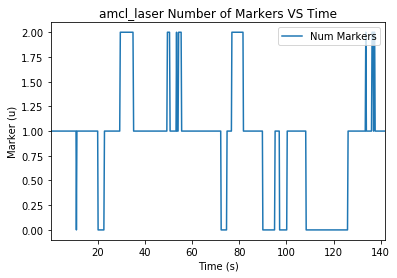

In [23]:
data_2.plot(kind = "line", x = "Time" ,y = {"Num Markers"})
plt.ylabel("Marker (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Markers VS Time")
plt.savefig( file + "_num_markers.png")

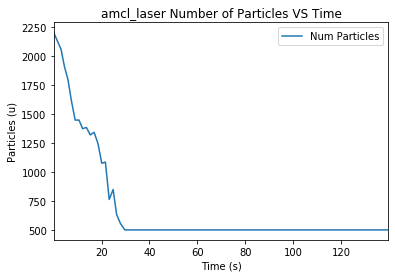

In [25]:
data_3.plot(kind = "line", x = "Time" ,y = {"Num Particles"})
plt.ylabel("Particles (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Particles VS Time")
plt.savefig( file + "_num_particles.png")

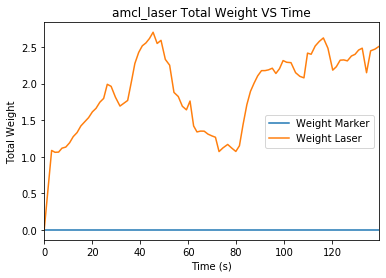

In [26]:
data_4.plot(kind = "line", x = "Time" ,y = {"Weight Laser", "Weight Marker"})
plt.ylabel("Total Weight")
plt.xlabel("Time (s)")
plt.title(file + " Total Weight VS Time")
plt.savefig( file + "_total_weight.png")

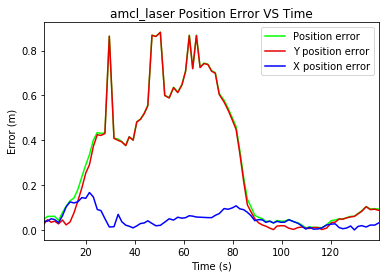

In [27]:
data.plot(kind = "line", x = "Time" ,y = {"X position error", "Y position error", "Position error"}, color = {(0.9,0.0,0.0), (0.0,1.0,0.0), (0.0,0.0,1.0)})
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.title(file + " Position Error VS Time")
plt.savefig( file + "_position_error.png")

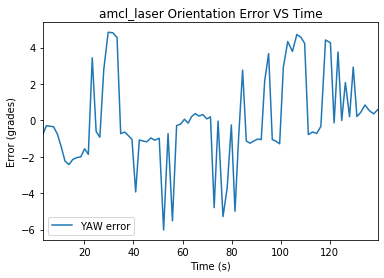

In [28]:
data.plot(kind = "line", x = "Time" ,y = {"YAW error"})
plt.ylabel("Error (grades)")
plt.xlabel("Time (s)")
plt.title(file + " Orientation Error VS Time")
plt.savefig(file + "_orientation_error.png")

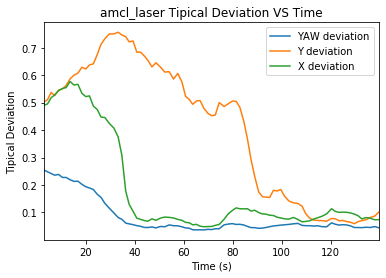

In [29]:
data.plot(kind = "line", x = "Time" ,y = {"X deviation", "Y deviation", "YAW deviation"})
plt.ylabel("Tipical Deviation")
plt.xlabel("Time (s)")
plt.title(file + " Tipical Deviation VS Time")
plt.savefig(file + "_tipical_desviation.png")

In [30]:
mean_x_error = round(data["X position error"].mean(), 3)
mean_y_error = round(data["Y position error"].mean(), 3)
mean_pos_error = round(data["Position error"].mean(), 3)
mean_yaw = round(data["YAW error"].abs().mean(), 3)
mean_x_covariance = round(data["X deviation"].mean(), 3)
mean_y_covariance = round(data["Y deviation"].mean(), 3)
mean_yaw_covariance = round(data["YAW deviation"].mean(), 3)
mean_weight_laser = round(data_4["Weight Laser"].mean(), 3)
mean_weight_marker = round(data_4["Weight Marker"].mean(), 3)
name_file = path + file + "_results.txt"
results = open(name_file, "w")
results.write("Mean laser weight: " + str(mean_weight_laser) + "\n")
results.write("Mean Marker weight: " + str(mean_weight_marker) + "\n")
results.write("Mean X position error: " + str(mean_x_error) + "\n")
results.write("Mean Y position error: " + str(mean_y_error) + "\n")
results.write("Mean Pos position error: " + str(mean_pos_error) + "\n")
results.write("Mean YAW error: " + str(mean_yaw) + "\n")
results.write("Mean X deviation: " + str(mean_x_covariance) + "\n")
results.write("Mean Y deviation: " + str(mean_y_covariance) + "\n")
results.write("Mean YAW deviation: " + str(mean_yaw_covariance) + "\n")
results.close()
name_file = path + file + "_results_comparative.txt"
comparative = open(name_file, "w")
comparative.write("Laser weight,Marker weight,X position error,Y position error,Pos position error,YAW error,X deviation,Y deviation,YAW deviation\n")
comparative.write(str(mean_weight_laser) + ",")
comparative.write(str(mean_weight_marker) + ",")
comparative.write(str(mean_x_error) + ",")
comparative.write(str(mean_y_error) + ",")
comparative.write(str(mean_pos_error) + ",")
comparative.write(str(mean_yaw) + ",")
comparative.write(str(mean_x_covariance) + ",")
comparative.write(str(mean_y_covariance) + ",")
comparative.write(str(mean_yaw_covariance))
comparative.close()